## Part 1 Scratching data
- use api to provide market data of crypto currency.

In [4]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import pandas as pd
from matplotlib import pyplot as plt
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'5000',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '28e68630-b8a8-4518-8a65-03727cef6d7d',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  
  df = pd.json_normalize(data, record_path='data')
  print(df)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

         id         name symbol       slug  num_market_pairs  \
0         1      Bitcoin    BTC    bitcoin             10486   
1      1027     Ethereum    ETH   ethereum              7495   
2       825  Tether USDt   USDT     tether             63280   
3      1839          BNB    BNB        bnb              1667   
4        52          XRP    XRP        xrp              1108   
...     ...          ...    ...        ...               ...   
4995  17987          OSK    OSK        osk                 3   
4996  24263    NGA Tiger    NGA  nga-tiger                 2   
4997  26336     Dinowars   DINW   dinowars                 3   
4998   9453        Agave   AGVE      agave                25   
4999  21113        BUILD  BUILD      build                68   

                    date_added  \
0     2010-07-13T00:00:00.000Z   
1     2015-08-07T00:00:00.000Z   
2     2015-02-25T00:00:00.000Z   
3     2017-07-25T00:00:00.000Z   
4     2013-08-04T00:00:00.000Z   
...                        

There are nested json data in the coming data, normalize them with pd.json normalize

## Tansformation 
-  This data is good to use.

In [5]:

df.to_csv('data.csv')

Plot percent change of 7 days. Find largest positive and largest negative.

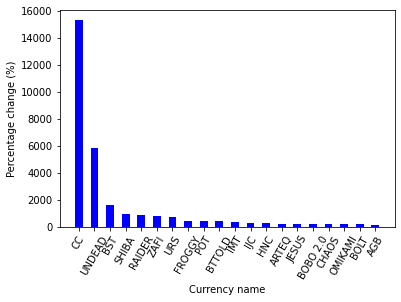

<Figure size 2880x288 with 0 Axes>

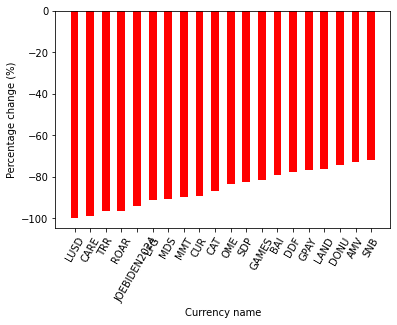

<Figure size 2880x288 with 0 Axes>

In [28]:

df.sort_values(by = ['quote.USD.percent_change_7d'], ascending=False, inplace = True)
plt.bar( df['symbol'].head(20),df['quote.USD.percent_change_7d'].head(20),color = 'blue', width=0.5)
plt.xticks(rotation=60)
plt.xlabel('Currency name')
plt.ylabel('Percentage change (%)')
plt.figure().set_figwidth(40)
plt.show()
df.sort_values(by = ['quote.USD.percent_change_7d'], ascending=True, inplace = True)
plt.bar( df['symbol'].head(20),df['quote.USD.percent_change_7d'].head(20),color = 'red', width=0.5)
plt.xlabel('Currency name')
plt.ylabel('Percentage change (%)')
plt.xticks(rotation = 60)
plt.figure().set_figwidth(40)
plt.show()

Price percentage change in 7 days. Lists greatest increase and greatest decrease. Note that there is a -100%.

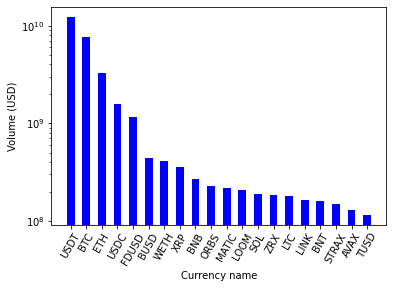

<Figure size 2880x288 with 0 Axes>

In [26]:
df.sort_values(by = ['quote.USD.volume_24h'], ascending=False, inplace = True)
plt.bar( df['symbol'].head(20),df['quote.USD.volume_24h'].head(20),color = 'blue', width=0.5)
plt.xticks(rotation = 60)
plt.yscale('log')
plt.xlabel('Currency name')
plt.ylabel('Volume (USD)')
plt.figure().set_figwidth(40)
plt.show()

24 hours volume. Top 20

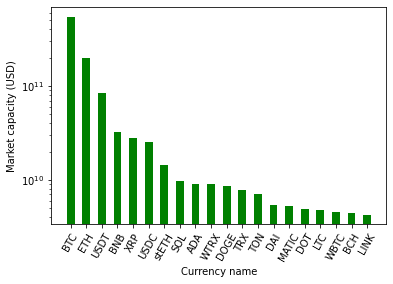

<Figure size 2880x288 with 0 Axes>

In [27]:
df.sort_values(by = ['quote.USD.market_cap'], ascending=False, inplace = True)
plt.bar( df['symbol'].head(20),df['quote.USD.market_cap'].head(20),color = 'green', width=0.5)
plt.xlabel('Currency name')
plt.ylabel('Market capacity (USD)')
plt.xticks(rotation = 60)
plt.yscale('log')
plt.figure().set_figwidth(40)
plt.show()

Market capacity rank to 20.